In [23]:
#Correr antes de probar cualquier punto
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym 
from sympy import integrate
from csv import reader
import urllib.request
from matplotlib.patches import StepPatch

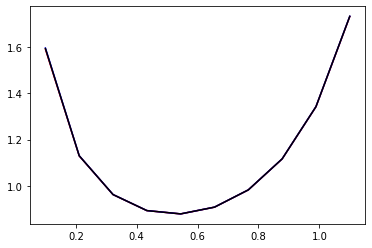

In [3]:

#PROBLEMA 8 

#a) Calcular analıticamente el polinomio que interpola el conjunto soporte.
c=1
Poly = lambda x : x**2+x+c
#b) Derivar el polinomio interpolador para encontrar la derivada en el punto x

intervalo= np.linspace(0.1,1.1,10)
tan = np.tan(intervalo)

def df_progresiva(f,x,h):
  df=np.zeros_like(intervalo)
  for i in range(len(x)):
    df_1= 1/(2*h)*(-3*f(x[i])+4*f(x[i]+h)-f(x[i]+(2*h)))
    df[i]=df_1
  return df

def df_central (f,x,h):
  df_central = np.zeros_like(intervalo)
  if h!=0:
     return (f(x+h)-f(x-h))/(h*2)

def df_analitica(x):
  return (1/(np.cos(x))**2)/(2*((np.tan(x))**0.5))

tan = lambda x: np.sqrt(np.tan(x))
y_progresiva= df_progresiva(tan,intervalo,1e-2)
y_central= df_central (tan,intervalo,1e-2)

y_analitica= df_analitica(intervalo)

plt.plot(intervalo,y_progresiva, "r")
plt.plot (intervalo, y_central,"b")
plt.plot(intervalo, y_analitica, "k")


5. Calcular todas las raíces reales de los primeros 20 polinomios de Laguerre

In [13]:

#raices de polinomios
#5.
n= 22
x= sym.Symbol('x')


def GetPolys (n):
  polys=[]
  for i in range(n): 
    factorial = np.math.factorial(i)
    y= sym.exp(-x)*(x**i)
    dy= y.diff(x,i)
    Poly= (sym.exp(x)/factorial)*dy
    Poly= sym.simplify(Poly)
    polys.append(Poly)
  return polys

polinomios_laguere = GetPolys(n)
d_poly=[]

for i in range(len(polinomios_laguere)):
  diff= polinomios_laguere[i].diff(x)
  d_poly.append(diff)


def MedNewtonRaphson (f,df,x0,Toleracia=1e-5,itmax=100): 
   error= 1
   it=0
   while error > Toleracia and it<=itmax:
     x = x0-f(x0)/df(x0)
     error = np.abs(f(x0)/df(x0))
     x0=x
     it+=1
    
   if it==itmax:
     False
   else:
     return x

def Conjunto_raices(f,df,x,precision=4):
   raices= []
   dan= np.array([])
   conjunto= []

   for i in x:
     raiz = MedNewtonRaphson(f,df,i)
     
     if raiz != False:
       n_raiz= np.round(raiz, precision)
       conjunto.append(n_raiz)

       if n_raiz not in raices:
         raices = np.append(raices,n_raiz)

   raices.sort()
   return raices

xn=np.linspace(0,100,100)
raices= []

for i in range(1,len(polinomios_laguere)):
  poly = sym.lambdify([x],polinomios_laguere[i],'numpy')
  dif= sym.lambdify([x],d_poly[i],'numpy')
  raiz= Conjunto_raices(poly,dif,xn)
  raices.append(raiz)

for i in range(len(raices)):
  print("las raices para el polinomio de grado",i, "de laguerre son:",raices[i])

las raices para el polinomio de grado 0 de laguerre son: [1.]
las raices para el polinomio de grado 1 de laguerre son: [0.5858 3.4142]
las raices para el polinomio de grado 2 de laguerre son: [0.4158 2.2943 6.2899]
las raices para el polinomio de grado 3 de laguerre son: [0.3225 1.7458 4.5366 9.3951]
las raices para el polinomio de grado 4 de laguerre son: [ 0.2636  1.4134  3.5964  7.0858 12.6408]
las raices para el polinomio de grado 5 de laguerre son: [ 0.2228  1.1889  2.9927  5.7751  9.8375 15.9829]
las raices para el polinomio de grado 6 de laguerre son: [ 0.193   1.0267  2.5679  4.9004  8.1822 12.7342 19.3957]
las raices para el polinomio de grado 7 de laguerre son: [ 0.1703  0.9037  2.2511  4.2667  7.0459 10.7585 15.7407 22.8631]
las raices para el polinomio de grado 8 de laguerre son: [ 0.1523  0.8072  2.0051  3.7835  6.205   9.373  13.4662 18.8336 26.3741]
las raices para el polinomio de grado 9 de laguerre son: [ 0.1378  0.7295  1.8083  3.4014  5.5525  8.3302 11.8438 16.2793 2

1 Demuestre que el polinomio interpolador es único:

1. INTERPOLACIÓN DE LAGRANGE: UNICIDAD DEL POLINOMIO INTERPOLADOR

Tenemos 3 puntos $$x0,x1,x2$$ que serán interpolados por dos polinomios $$Q(x), P(x) →  ax^2+bx+c $$.

 Entonces, existe polinomio $R(x)= Q(x)- P(x)$ donde al evaluar la resta de la función en cada punto que intersectan ambos polinomios obtenemos:
$$R(x)= Q(x0)- P(x0) = 0$$ $$R(x)= Q(x1)- P(x1)=0$$ $$R(x)= Q(x2)- P(x2)=0$$

debido a que las restas nos dan cero, obtemos entonces que $x0,x1,x2$ son raíces de $R(x)$, sin embargo, $R(x)$ es polinomio de la forma $ ax^2+bx+c$ por lo que la única forma de que dicho polinomio tenga dos raíces es que: $$R(x)=0$$
Si lo anterior pasa entonces tenemos:
$$  Q(x)- P(x)=0$$ $$  Q(x)=  P(x)$$

Se demuestra que los polinomios interpoladores son únicos.


-0.0554912422401579*x**2 + 0.363970234266202*x + 2.22044604925031e-16


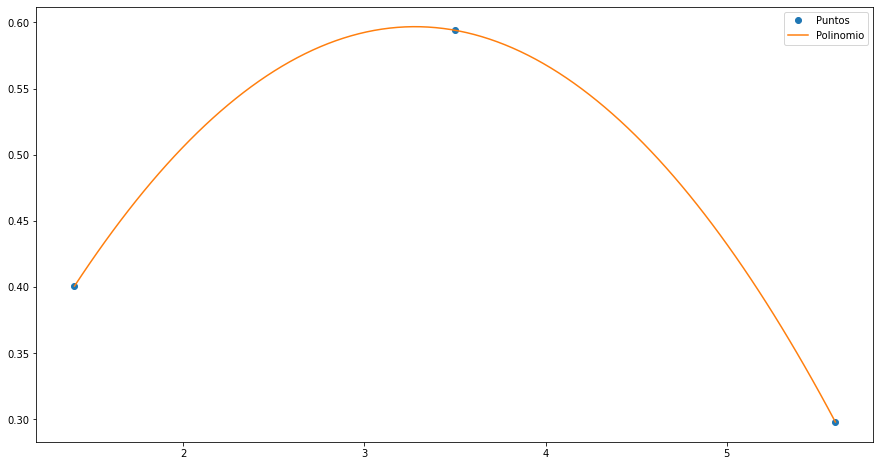

In [ ]:
#4
x=sym.Symbol("x")

def Lagrange(xi,fi):
  polinomio=0
  for i in range(len(xi)):
    numerador=1
    denominador=1
    for j in range(len(xi)):
      if j!=i:
        numerador*= x-xi[j]
        denominador *= xi[i]-xi[j]

    termino=numerador/denominador
    polinomio+= termino*fi[i]

  return polinomio

def valores(xi,fi):
  polinomio= Lagrange(xi,fi)
  simplicacion = polinomio.expand()
  px=sym.lambdify(x,simplicacion)
  muestra = 100
  a,b = min(xi),max(xi)
  pxi= np.linspace(a,b,muestra)
  pfi= px(pxi)
  return pxi,pfi,polinomio,simplicacion

def graficar(xi,fi,pxi,pfi):
  plt.subplots(figsize=(15,8))
  plt.plot(xi,fi,"o",label="Puntos")
  plt.plot(pxi,pfi,label="Polinomio")
  plt.legend()

xi=np.array([1.4,3.5,5.6])
yi=np.array([0.4007954931819738,0.594128102489774,0.29802795523938164])

pxi,pfi,polinomio,simplicacion= valores(xi,yi)
print(simplicacion)
grafica = graficar (xi,yi,pxi,pfi)

Los cofecientes de la interpolacion cocuerdan con los valores de la expresion de trayectoria para movimiento parabolico con los datos iniciales presentados.

-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0


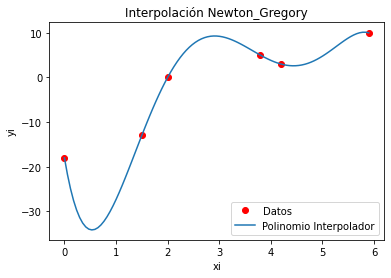

In [15]:
#5 interpolación Newton-Gregory
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'

data=[[0,-18],
[1.5,-13],
[2,0],
[3.8,5],
[4.2,3],
[5.9,10]]

datos= np.array(data)
xi=[]
yi=[]
for i in range(len(datos)):
  xi.append(datos[i][0])
  yi.append(datos[i][1])

title= ['i','xi','fi']
n=len(xi)
ki=np.arange(0,n,1)
matrix= np.concatenate(([ki],[xi],[yi]),axis=0)
matrix= np.transpose(matrix)

dfinita = np.zeros(shape=(n,n),dtype=float)
matrix= np.concatenate((matrix,dfinita),axis=1)


#Calcular la matrix
[n,m]=np.shape(matrix)
diagonal = n-1
j=3
while j < m: 
  title.append('F['+str(j-2)+']')
  i=0
  paso= j-2
  while (i<diagonal):
    denominador =(xi[i+paso]-xi[i])
    numerador = matrix[i+1,j-1]-matrix[i,j-1]
    matrix[i,j]= numerador/denominador
    i+=1
  diagonal -= 1
  j+=1

#Polinomio con diferencias divididas
dDividida= matrix[0,3:]
n=len(dfinita)

x=sym.Symbol('x')
polinomio=yi[0]
for j in range(1,n,1):
  factor=dDividida[j-1]
  termino=1
  for k in range(0,j,1):
    termino = termino*(x-xi[k])
  polinomio=polinomio+termino*factor

simplificacion= polinomio.expand()
px=sym.lambdify(x,simplificacion)
print(simplificacion)
muestra=101
a=np.amin(xi)
b=np.amax(xi)
pxi=np.linspace(a,b,muestra)
pfi=px(pxi)

#Graficar
plt.plot(xi,yi,'o',color='r',label='Datos')
plt.plot(pxi,pfi,label='Polinomio Interpolador')
plt.legend()
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Interpolación Newton_Gregory')
plt.show()


1. INTEGRACION Hacer pasos intermedios para regla de trapecio simple
 → $$\frac{f(a)}{(a-b)} \frac{x^2}{2}-bx + \frac{f(b)}{(b-a)}(\frac{x^2}{2}-ax)$$
 reemplazamos los límites
 $$\frac{f(a)}{(a-b)}[ \frac{-b^2-a^2+2ab}{2}] + \frac{f(b)}{(b-a)}(\frac{b^2-2ab+a^2}{2})$$

factorizamos numerador:
$$-\frac{f(a)}{(a-b)}[\frac{(a-b)^2}{2}] + \frac{f(b)}{(b-a)}(\frac{(b-a)^2}{2})$$

reducimos terminos
$$f(a)[\frac{(b-a)}{2}] + f(b)(\frac{(b-a)}{2})$$

factorizamos
$$\frac{f(a)+f(b)}{2} (b-a)$$



3. Hacer los pasos intermedios para encontrar la regla de Simpson simple

$$∫\frac{(x-b)(x-(a+b)/2)}{(a-b)(a-(a+b)/2)}f(a)+ ∫\frac{(x-a)(x-b)}{((a+b)/2-a)((a+b)/2 -b)}f((a+b)/2)+∫\frac{(x-a)(x-(a+b)/2)}{((b-a)((b-(a+b)/2)}f(b)$$
La integral general es la suma de la integrales. Entonces, las desarrollaremos por aparte para hacer su sumatoria. **Primera integral**: $$∫\frac{(x-b)(x-(a+b)/2)}{(a-b)(a-(a+b)/2)}f(a)$$ al integrar
$$=(x^3/3 - ax^2/4- bx^2/4-bx^2/2 + abx2 + b^2x/2) \frac{2f(a)}{(a-b)^2}$$
al evaluar en los limites:
$$1/6f(a)(b-a)$$
**segunda integral:**
$$∫\frac{(x-a)(x-b)}{((a+b)/2-a)((a+b)/2 -b)} (\frac{4f(xm)}{-(a-b)^2})$$ al integral
$$=(x^3/3- bx^2/2- ax^2/2+ abx )(\frac{4f(xm)}{-(a-b)^2})$$ al evaluar limites $$=2/3 F(xm)(b-a)$$
**tercera integral:**
$$∫\frac{(x-a)(x-(a+b)/2)}{((b-a)((b-(a+b)/2)}f(b)$$ al integrar $$=(x^2- ax/2 -bx/2 -ax +a^2/2 + ab/2) (\frac{2f(b)}{(b-a)^2})$$ al evaluar limite
$$=1/6 f(b) (b-a) $$
suma de las tres integrales definidas obtenidas: $$1/6f(a)(b-a) +2/3 F(xm)(b-a) + 1/6 f(b) (b-a) $$
$$= \frac{(b-a)}{6} (f(a)+ 4(xm) +f(b))$$
tenemos que $h= (b-a)/n$ donde $n=2$ porque es un polinomio de segundo grado, entonces la integral es: 
$$\frac{h}{3} ( f(a)+ 4f(xm) +f(b))$$

El volumen encerrado en la semiesfera es:  2.0943195841075304


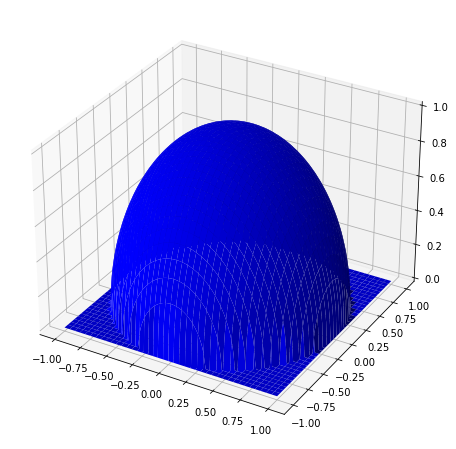

In [19]:
#7
n = 200
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)
a = 0.
b = x[-1]
R = 1

def f(x,y,R=1.): 
    z = R**2 - x**2 - y**2
    if z <= 0.:
        return 0.
    else:
        return np.sqrt(z)
f = np.vectorize(f)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,color="b")

area=(x[1]-x[0])*(y[1]-y[0])
volumen=0

for i in range(len(x)):
    for j in range(len(y)):
        p_1=f(x[i],y[j])
        p_2=f(x[i-1],y[j])
        p_3=f(x[i-1],y[j-1])
        p_4=f(x[i],y[j-1])
        
        if p_1 in Z and p_2 in Z and p_3 in Z and p_4 in Z:
            promedio=(p_1+p_2+p_3+p_4)/4
            vol_i=promedio*area
            volumen+=vol_i
    
print("El volumen encerrado en la semiesfera es: ",volumen)

In [22]:
#14
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
n=8

def Poly_legen (n,x,y):
  y= (x**2 - 1)**n
  poly = sym.diff(y,x,n)/(2**n *np.math.factorial(n))
  return poly

poly1= 3+5*x+x**2

coeficiente = np.zeros(5)

for i in range(len(coeficiente)):
  legendre= Poly_legen(i,x,y)
  polinomio = poly1*legendre
  polinomio = sym.simplify(polinomio)
  integrar = (integrate(polinomio,(x,-1,1)))/2
  coeficiente[i] = (2*i+1)*integrar


Polinomios = []
for i in range(len(coeficiente)):
  if coeficiente[i] !=0.:
    Polinomios.append(Poly_legen(i,x,y))
    
print("El polinomio en base de legendre es:",coeficiente[0],"*P0 +",coeficiente[1],"*P1 +",coeficiente[2],"*P2")



El polinomio en base de legendre es: 3.3333333333333335 *P0 + 5.0 *P1 + 0.6666666666666666 *P2


6.481130171540027


Text(0, 0.5, 'Exactitud')

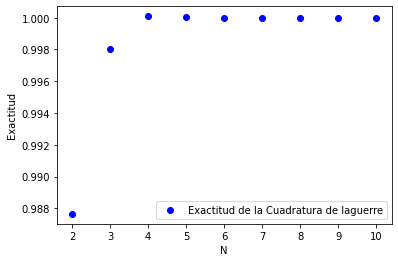

In [24]:
#17
n=3
a=0
f= lambda x: x**3/(np.exp(x)-1)

def cuadraturagauss(f,a,n):
  Roots1, Weights1 = np.polynomial.laguerre.laggauss(n)
  suma =0
  for i in range(n):
    valor = Weights1[i]*np.exp(Roots1[i])*f(Roots1[a+i])
    suma+= valor
  return suma

integral = cuadraturagauss(f,a,n)
print(integral)

#B
exacto = ((np.pi)**4)/15
N=[2,3,4,5,6,7,8,9,10]
puntos=[]
for i in N:
  aproximacion = cuadraturagauss(f,a,i)
  error = aproximacion/exacto
  puntos.append(error)

plt.scatter(N,puntos,color='b',label='Exactitud de la Cuadratura de laguerre')
plt.legend()
plt.xlabel('N')
plt.ylabel('Exactitud')


18 Integrales con hermite


In [27]:

def MedNewtonRaphson (f,df,x0,Toleracia=1e-5,itmax=100): 
   error= 1
   it=0
   while error > Toleracia and it<=itmax:
     x = x0-f(x0)/df(x0)
     error = np.abs(f(x0)/df(x0))
     x0=x
     it+=1
    
   if it==itmax:
     False

   else:
     return x

def Conjunto_raices(f,df,x,precision=4):
   raices= []
   dan= np.array([])
   conjunto= []

   for i in x:
     raiz = MedNewtonRaphson(f,df,i)
     
     if raiz != False:
       n_raiz= np.round(raiz, precision)
       conjunto.append(n_raiz)

       if n_raiz not in raices:
         raices = np.append(raices,n_raiz)

   raices.sort()
   return raices

#Polinomio de hermite
X= sym.Symbol('x',real=True)
n=20

def GetHermitepoly(x,n):
  f= sym.exp(-x**2)
  df= f.diff(x,n)
  poly= ((-1)**n)*sym.exp(x**2)*df
  return poly

H=[]
dH=[]
for i in range(n+1):
  Hermite= GetHermitepoly(X,i)
  diff= Hermite.diff(X)
  H.append(Hermite)
  dH.append(diff)


def All_roots (n,xn,Hermite,DHermite):
    poly = sym.lambdify([X],Hermite[n],'numpy')
    Dpoly = sym.lambdify([X],DHermite[n],'numpy')
    raices = Conjunto_raices(poly,Dpoly,xn)
    return raices

xn= np.linspace(-10,10,100)
raices = All_roots(n,xn,H,dH)

def GetWeights (raices,Hermite):
    poly_1= sym.lambdify([X],Hermite[n-1],'numpy')
    pesos = []
    for i in range(n):
        Weights= ((2**(n-1))*(np.math.factorial(n))*(np.sqrt(np.pi)))/((n**2)*(poly_1((raices[i]))**2))
        pesos.append(Weights)
    return pesos

print("las raices del polinomio de herminte de grado",n, "son: ",raices)
print("los pesos del polinomio de herminte de grado",n, "son: ",GetWeights(raices,H))

las raices del polinomio de herminte de grado 20 son:  [-5.3875 -4.6037 -3.9448 -3.3479 -2.7888 -2.255  -1.7385 -1.2341 -0.7375
 -0.2453  0.2453  0.7375  1.2341  1.7385  2.255   2.7888  3.3479  3.9448
  4.6037  5.3875]
los pesos del polinomio de herminte de grado 20 son:  [2.228475759267953e-13, 4.397919464625517e-10, 1.0854533489857231e-07, 7.797811402576928e-06, 0.00022835406869479595, 0.003243012854882413, 0.02481702978371747, 0.10900440961594783, 0.28665329695469116, 0.46226216553534033, 0.46226216553534033, 0.28665329695469116, 0.10900440961594783, 0.02481702978371747, 0.003243012854882413, 0.00022835406869479595, 7.797811402576928e-06, 1.0854533489857231e-07, 4.397919464625517e-10, 2.228475759267953e-13]


In [28]:
#Oscilador armonico en mecanica cuantica
f= lambda x: (x**4)
n=20
xn= np.linspace(-10,10,100)
Raices = All_roots(n,xn,H,dH)
Pesos=GetWeights(raices,H)
suma=0
for i in range(n):
    valor= Pesos[i]*f(Raices[i])
    suma+=valor

integral = 2*(1/np.pi)**(1/2)*suma
print("el valor medio de la posicion de la particula en el primer esta existaod es :",integral)

el valor medio de la posicion de la particula en el primer esta existaod es : 1.5000418239846258


In [47]:
#19
#SUPERCONDUCTIVIDAD


def funcion (x, T, dT):
  f1=np.sqrt((x**2)+ dT**2)
  f2= f1*300/(2*T)
  tan= np.tanh(f2)
  return tan /(2*np.sqrt((x**2)+dT**2))

Raices, Pesos = np.polynomial.legendre.leggauss(50)

t=1
tc=0
while t<(20):
  integral=np.sum(Pesos*funcion(Raices,t,0))
  if np.abs(integral-(1/0.3)) < 1e-4:
    tc=t
    break
  
  t+=1e-4

print("la temperatura crítica es igual a: ",round(tc,5),"K")

la temperatura crítica es igual a:  12.1336 K
